In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cmocean.cm as cmo

import matplotlib
# Restore RC params
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

In [2]:
df = pd.read_excel('Results/Table_Percent_IPCC-Region.xlsx')
# Remove blank spaces
df['IPCC-Region'] = df['IPCC-Region'].str.strip()

In [3]:
# List of index in order
index_etccdi = ['r10mm', 'r20mm', 'r30mm', 'rx1day', 'rx5day', 'prcptot', 'sdii', 'r95p', 'r99p', 'cwd', 'cdd',
                'txx', 'tnx', 'txn', 'tnn', 'dtr', 'wsdi', 'csdi', 'tx90p', 'tn90p', 'tx10p', 'tn10p', 'fd']

precipitation_index = ['r10mm', 'r20mm', 'r30mm', 'rx1day',
                       'rx5day', 'prcptot', 'sdii', 'r95p', 'r99p', 'cwd', 'cdd']
temp_index = ['txx', 'tnx', 'txn', 'tnn', 'dtr', 'wsdi',
              'csdi', 'tx90p', 'tn90p', 'tx10p', 'tn10p', 'fd']


In [4]:
# Pivot Table
# Positive trends
Z1_IPCC = df.loc[df['Sign_Trends'] == 'Increasing'].pivot_table(index='Index_ETCCDI', columns='IPCC-Region',
                                                           values='Percentage').T
# Change nan to 0
Z1_IPCC = Z1_IPCC.fillna(0)

# Negative trends
Z2_IPCC = df.loc[df['Sign_Trends'] == 'Decreasing'].pivot_table(index='Index_ETCCDI', columns='IPCC-Region',
                                                           values='Percentage').T
# Change nan to 0
Z2_IPCC = Z2_IPCC.fillna(0)

In [5]:
# change order
Z1_PREC_IPCC = Z1_IPCC[[x for x in precipitation_index]]
Z2_PREC_IPCC = Z2_IPCC[[x for x in precipitation_index]]
Z1_TEMP_IPCC = Z1_IPCC[[x for x in temp_index]]
Z2_TEMP_IPCC = Z2_IPCC[[x for x in temp_index]]

In [57]:
columns_prec = Z1_PREC_IPCC.columns.to_list()
X_prec = [x.upper() for x in columns_prec]
columns_temp = Z1_TEMP_IPCC.columns.to_list()
X_temp = [x.upper() for x in columns_temp]

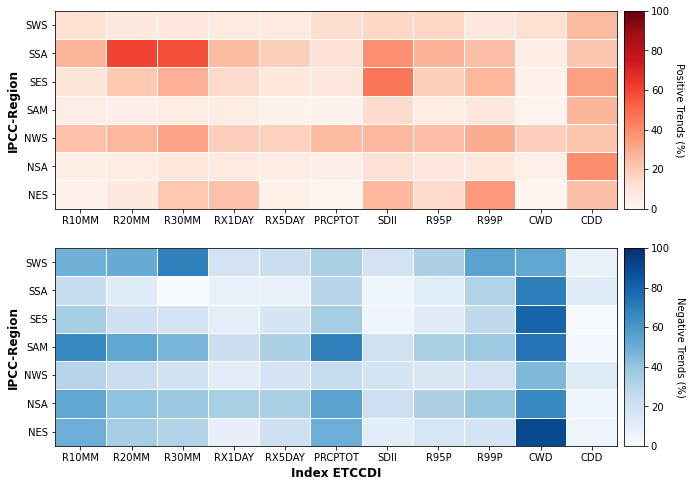

In [74]:
# Plot heatmap precipitation with matplotlib
levels = np.arange(0, 100, 10)
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)

# Positive trends
im1 = ax1.pcolormesh(Z1_PREC_IPCC, cmap='Reds', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax1.set_xticks(np.arange(Z1_PREC_IPCC.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(Z1_PREC_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax1.set_xticklabels(X_prec, minor=False)
ax1.set_yticklabels(Z1_PREC_IPCC.index, minor=False)
ax1.set_ylabel('IPCC-Region', fontsize=12, fontweight='bold')
# cbar
cbar = fig.colorbar(im1, ax=ax1, pad=0.01, aspect=10)
cbar.set_label('Positive Trends (%)', rotation=270, labelpad=15)

# Negative trends
im2 = ax2.pcolormesh(Z2_PREC_IPCC, cmap='Blues', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax2.set_xticks(np.arange(Z2_PREC_IPCC.shape[1]) + 0.5, minor=False)
ax2.set_yticks(np.arange(Z2_PREC_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax2.set_xticklabels(X_prec, minor=False)
ax2.set_yticklabels(Z2_PREC_IPCC.index, minor=False)
ax2.set_ylabel('IPCC-Region', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_xlabel('Index ETCCDI', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# cbar
cbar = fig.colorbar(im2, ax=ax2, pad=0.01, aspect=10)
cbar.set_label('Negative Trends (%)', rotation=270, labelpad=15)

# annotation
# ax1.set_title('Positive trends at 95% confidence level', loc='left')
# ax2.set_title('Negative trends at 95% confidence level', loc='left')

# Save figure
fig.savefig('Figuras/Heatmap_Precipitation_IPCC-Region.png', dpi=300, bbox_inches='tight', facecolor='w')

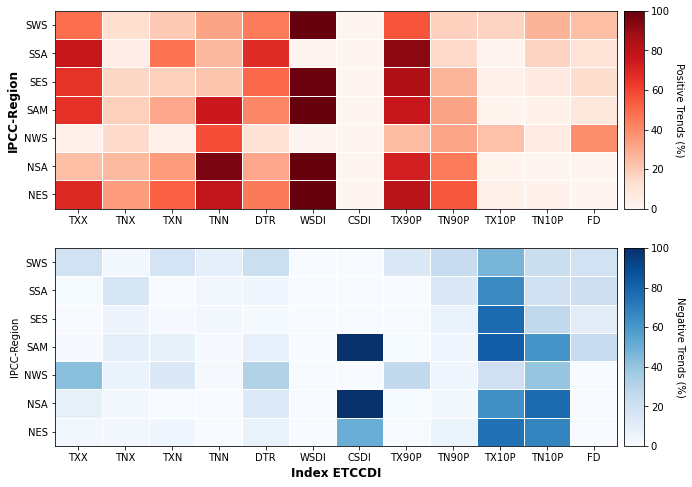

In [75]:
# Plot heatmap temperature with matplotlib
levels = np.arange(0, 100, 10)
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)

# Positive trends
im1 = ax1.pcolormesh(Z1_TEMP_IPCC, cmap='Reds', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax1.set_xticks(np.arange(Z1_TEMP_IPCC.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(Z1_TEMP_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax1.set_xticklabels(X_temp, minor=False)
ax1.set_yticklabels(Z1_TEMP_IPCC.index, minor=False)
ax1.set_ylabel('IPCC-Region', fontsize=12, fontweight='bold')
# cbar
cbar = fig.colorbar(im1, ax=ax1, pad=0.01, aspect=10)
cbar.set_label('Positive Trends (%)', rotation=270, labelpad=15)

# Negative trends
im2 = ax2.pcolormesh(Z2_TEMP_IPCC, cmap='Blues', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax2.set_xticks(np.arange(Z2_TEMP_IPCC.shape[1]) + 0.5, minor=False)
ax2.set_yticks(np.arange(Z2_TEMP_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax2.set_xticklabels(X_temp, minor=False)
ax2.set_yticklabels(Z2_TEMP_IPCC.index, minor=False)
ax2.set_ylabel('IPCC-Region')
ax2.set_xlabel('Index ETCCDI', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# cbar
cbar = fig.colorbar(im2, ax=ax2, pad=0.01, aspect=10)
cbar.set_label('Negative Trends (%)', rotation=270, labelpad=15)

# save figure
fig.savefig('Figuras/Heatmap_Temperature_IPCC-Region.png', dpi=300, bbox_inches='tight', facecolor='w')

In [76]:
# # Plot heatmap with seaborn
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(Z1_PREC_IPCC, cmap='Reds', annot=True, 
# vmin=0, vmax=100, ax=ax, cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5, linecolor='w')

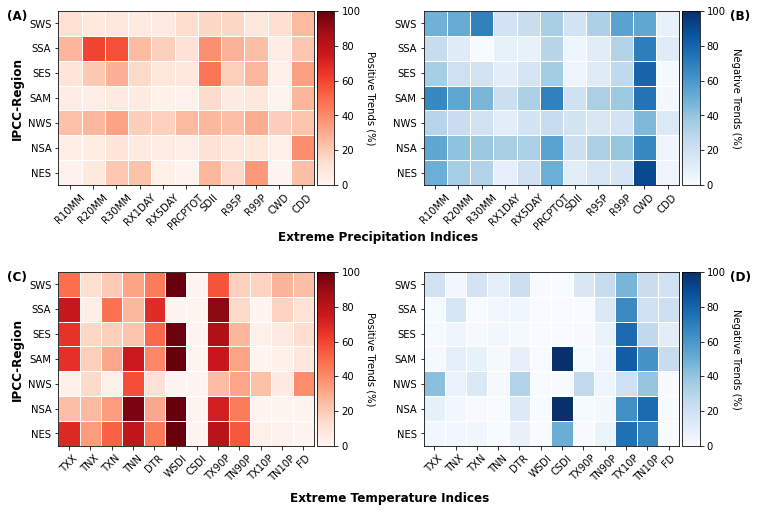

In [146]:
# Plot Precipitation and Temperature with matplotlib
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 8), nrows=2, ncols=2, gridspec_kw={'hspace': 0.5})
rotation = 45
# Positive trends
im1 = ax1.pcolormesh(Z1_PREC_IPCC, cmap='Reds', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax1.set_xticks(np.arange(Z1_PREC_IPCC.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(Z1_PREC_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax1.set_xticklabels(X_prec, minor=False, rotation=rotation)
ax1.set_yticklabels(Z1_PREC_IPCC.index, minor=False)
ax1.set_ylabel('IPCC-Region', fontsize=12, fontweight='bold')
# cbar
cbar = fig.colorbar(im1, ax=ax1, pad=0.01, aspect=10)
cbar.set_label('Positive Trends (%)', rotation=270, labelpad=15)

# Negative trends
im2 = ax2.pcolormesh(Z2_PREC_IPCC, cmap='Blues', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax2.set_xticks(np.arange(Z2_PREC_IPCC.shape[1]) + 0.5, minor=False)
ax2.set_yticks(np.arange(Z2_PREC_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax2.set_xticklabels(X_prec, minor=False, rotation=rotation)
ax2.set_yticklabels(Z2_PREC_IPCC.index, minor=False)
# set sup xlabel
# fig.supxlabel('Extreme Precipitation Indices', fontsize=12, fontweight='bold', y=0.45)
ax2.text(-6.25, -2.25, 'Extreme Precipitation Indices', fontdict={'fontsize': 12, 'fontweight': 'bold'}, )
# ax2.set_ylabel('IPCC-Region', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# cbar
cbar = fig.colorbar(im2, ax=ax2, pad=0.01, aspect=10)
cbar.set_label('Negative Trends (%)', rotation=270, labelpad=15)

# Positive trends
im3 = ax3.pcolormesh(Z1_TEMP_IPCC, cmap='Reds', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax3.set_xticks(np.arange(Z1_TEMP_IPCC.shape[1]) + 0.5, minor=False)
ax3.set_yticks(np.arange(Z1_TEMP_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax3.set_xticklabels(X_temp, minor=False, rotation=rotation)
ax3.set_yticklabels(Z1_TEMP_IPCC.index, minor=False)
ax3.set_ylabel('IPCC-Region', fontsize=12, fontweight='bold')
# ax3.set_xlabel('Index ETCCDI', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# cbar
cbar = fig.colorbar(im3, ax=ax3, pad=0.01, aspect=10)
cbar.set_label('Positive Trends (%)', rotation=270, labelpad=15)

# Negative trends
im4 = ax4.pcolormesh(Z2_TEMP_IPCC, cmap='Blues', vmin=0, vmax=100, edgecolors='w', linewidths=0.5)
# Set ticks
ax4.set_xticks(np.arange(Z2_TEMP_IPCC.shape[1]) + 0.5, minor=False)
ax4.set_yticks(np.arange(Z2_TEMP_IPCC.shape[0]) + 0.5, minor=False)
# Set tick labels
ax4.set_xticklabels(X_temp, minor=False, rotation=rotation)
ax4.set_yticklabels(Z2_TEMP_IPCC.index, minor=False)
# ax4.set_ylabel('IPCC-Region', fontsize=12, fontweight='bold')
# ax4.set_xlabel('Index ETCCDI', fontdict={'fontsize': 12, 'fontweight': 'bold'})
# cbar
cbar = fig.colorbar(im4, ax=ax4, pad=0.01, aspect=10)
cbar.set_label('Negative Trends (%)', rotation=270, labelpad=15)
# supxlabel
ax4.text(-6.25, -2.25, 'Extreme Temperature Indices', fontdict={'fontsize': 12, 'fontweight': 'bold'}, )

# Annotate A B, C and D
ax1.annotate('(A)', xy=(-0.20, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')
ax2.annotate('(B)', xy=(1.20, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')
ax3.annotate('(C)', xy=(-0.20, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')
ax4.annotate('(D)', xy=(1.20, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')



# save figure
fig.savefig('Figuras/Heatmap_Precipitation_Temperature_IPCC-Region.png', dpi=600, bbox_inches='tight', facecolor='w')